# Lab 4 – Doing regression.
Here is what we will do:
1. Prepare the data
2. Train and analyze a linear regression
- single input feature
- multiple input features
3. Train and analyze a polynomial regression
4. Train and analyze a regularized model

### Prepare the data

In [2]:
# third cell -
import pandas as pd
howell_full = pd.read_csv("Howell.csv", sep=";")

# Compute bmi based on height and weight metric units

def bmi(height, weight):
    return 10000*weight/(height**2)


new_feature = bmi(howell_full['height'], howell_full['weight'])

howell_full['bmi'] = new_feature
howell_full.head(n=10)

import numpy as np

def bmi_category(bmi):
    #bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])



howell_full['bmi class'].value_counts()

Underweight    341
Normal         202
Overweight       1
Name: bmi class, dtype: int64

### A Better Plot

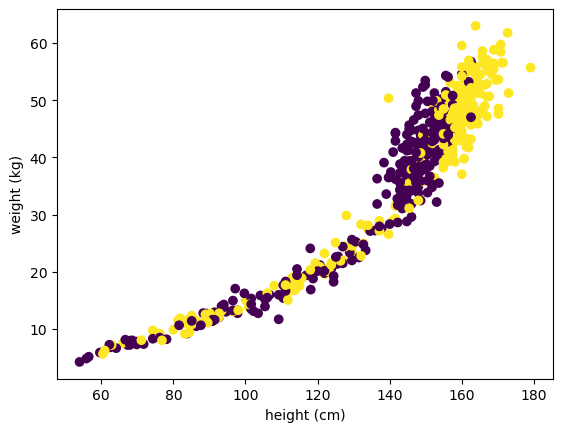

In [3]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']

# plt.scatter(height, weight)
# plt.xlabel('height (cm)')
#plt.ylabel('weight (kg)')
#plt.show()

gender = howell_full['male']
plt.scatter (height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

age = howell_full['age']
# plt.scatter(age, height, c=gender)
#plt.xlabel('age (years)')
#plt.ylabel('height (cm)')
#plt.show()

In [4]:
# Compute bmi based on height and weight metric units

def bmi(height, weight):
    return 10000*weight/(height**2)


new_feature = bmi(howell_full['height'], howell_full['weight'])

howell_full['bmi'] = new_feature
howell_full.head(n=10)

,height,weight,age,male,bmi,bmi class
0,151.765,47.825606,63.0,1,20.764297,Normal
1,139.700,36.485807,63.0,0,18.695244,Normal
2,136.525,31.864838,65.0,0,17.095718,Underweight
3,156.845,53.041914,41.0,1,21.561444,Normal
4,145.415,41.276872,51.0,0,19.520384,Normal
5,163.830,62.992589,35.0,1,23.469433,Normal
6,149.225,38.243476,32.0,0,17.174108,Underweight
7,168.910,55.479971,27.0,1,19.445786,Normal
8,147.955,34.869885,19.0,0,15.929099,Underweight
9,165.100,54.487739,54.0,1,19.989625,Normal


In [5]:
import numpy as np

def bmi_category(bmi):
    #bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])



howell_full['bmi class'].value_counts()

Underweight    341
Normal         202
Overweight       1
Name: bmi class, dtype: int64

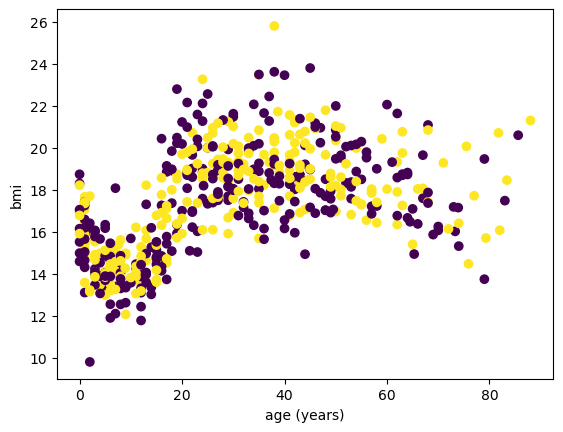

In [6]:

import matplotlib.pyplot as plt

age = howell_full['age']
bmi = howell_full['bmi']
gender = howell_full['male']
plt.scatter(age, bmi, c=gender)
plt.xlabel('age (years)')
plt.ylabel('bmi')
plt.show()


In [7]:
over18 = howell_full["age"] >18
print(over18)

# Only keep the true instances
howell_adults = howell_full[over18]
howell_children = howell_full[-over18]

print("There are ", len(howell_adults), "adult instances")
print (howell_adults)

print("There are ", len(howell_children), "child instances")
print(howell_children)

0       True
1       True
2       True
3       True
4       True
       ...  
539    False
540     True
541     True
542    False
543     True
Name: age, Length: 544, dtype: bool
There are  346 adult instances
      height     weight   age  male        bmi    bmi class
0    151.765  47.825606  63.0     1  20.764297       Normal
1    139.700  36.485807  63.0     0  18.695244       Normal
2    136.525  31.864838  65.0     0  17.095718  Underweight
3    156.845  53.041914  41.0     1  21.561444       Normal
4    145.415  41.276872  51.0     0  19.520384       Normal
..       ...        ...   ...   ...        ...          ...
534  162.560  47.031821  27.0     0  17.797722  Underweight
537  142.875  34.246196  31.0     0  16.776442  Underweight
540  162.560  52.163080  31.0     1  19.739486       Normal
541  156.210  54.062497  21.0     0  22.155341       Normal
543  158.750  52.531624  68.0     1  20.844590       Normal

[346 rows x 6 columns]
There are  198 child instances
      height   

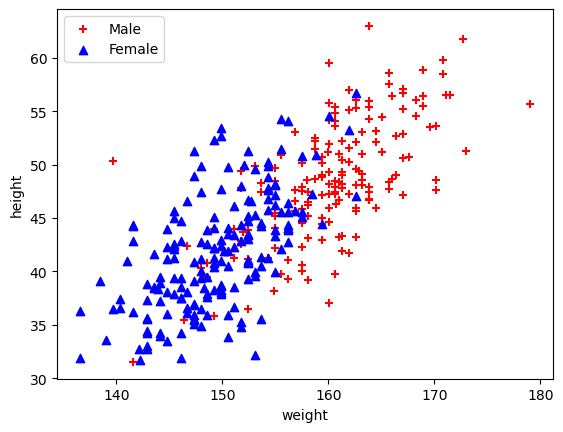

In [8]:
import matplotlib.pyplot as plt
male_height = np.ma.masked_where(howell_adults['male']==0,
                                 howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male']==1,
                                   howell_adults['height'])

weight = howell_adults['weight']
plt.scatter(male_height, weight, c='red', marker='+')
plt.scatter(female_height, weight, c='blue', marker='^')

plt.xlabel('weight')
plt.ylabel('height')
plt.legend(['Male', 'Female'])
plt.show()

## Train/Test Data Split

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(howell_full, 
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))



Train size:  435 Test size:  109


### Train and evaluate a Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height']]
y = train_set['weight']
X_test = test_set[['height']]
y_test = test_set['weight']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -34.334841842678905
 Coefficients [0.50625269]
 Score 0.8892970528522413
MAE is  3.9868013743337323
RMSE is  4.90141925512166
MSE is  24.023910714477374
R^2  0.8892970528522413

Results for linear regression on test data
MAE is  4.268058841968443
RMSE is  5.308233145876226
MSE is  28.177339130979018
R^2  0.8677460846087206


### Plot linear regression model
Using height to predict weight

C:\Users\jorda\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


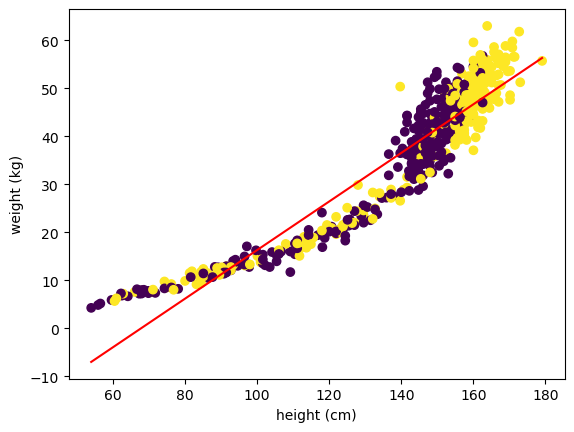

In [67]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']
#Setting Heights
min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)
#List Comprehension
x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

gender = howell_full['male']
plt.scatter (height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.plot(x_values, y_values, c='red')
plt.show()


### Add a Feature to the Model

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height', 'age']]
y = train_set['weight']
X_test = test_set[['height', 'age']]
y_test = test_set['weight']

lrTwoInput_model = LinearRegression()
lrTwoInput_model.fit(X,y)

y_pred = lrTwoInput_model.predict(X)
print('Results for linear regression on training data')
print('Input: Height, age')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lrTwoInput_model.intercept_)
print(' Coefficients', lrTwoInput_model.coef_)
print(' Score', lrTwoInput_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lrTwoInput_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('Input: Height, age')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Input: Height, age
 Default settings
Internal parameters:
 Bias is  -32.98178635167826
 Coefficients [0.48959129 0.03198353]
 Score 0.8903963296817052
MAE is  3.9844579179380495
RMSE is  4.877023070139709
MSE is  23.78535402667495
R^2  0.8903963296817052

Results for linear regression on test data
Input: Height, age
MAE is  4.1967168519461024
RMSE is  5.183466125624855
MSE is  26.86832107550034
R^2  0.8738901268956872


### Use Polynomial Regression

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  30.629797588279324
 Coefficients [-1.05820289e-06 -5.87627285e-05 -1.70143834e-03  6.23651557e-05
 -9.32812647e-07  7.00937041e-09 -2.62046962e-11  3.88231046e-14]
 Score 0.9379323627912809
MAE is  2.6922459648842825
RMSE is  3.670074393444291
MSE is  13.469446053415481
R^2  0.9379323627912809

Results for linear regression on test data
MAE is  3.102669986139888
RMSE is  4.257785847545945
MSE is  18.12874032356254
R^2  0.9149104577349206


### Polynomial Regress Graph

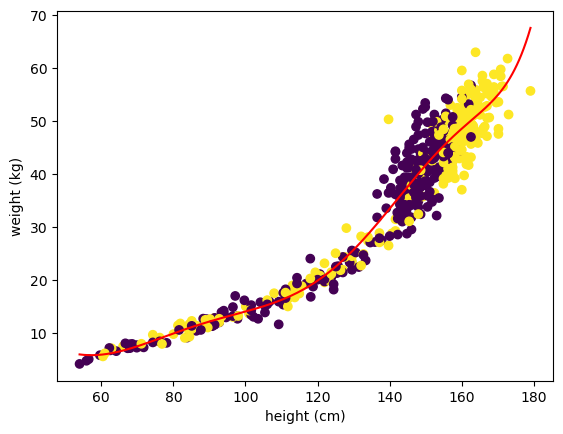

In [72]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']
#Setting Heights
min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)
#List Comprehension
x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)

gender = howell_full['male']
plt.scatter (height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.plot(x_values, y_values, c='red')
plt.show()


### Elastic Net with Poly Features

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', reg_lr_model.intercept_)
print(' Coefficients', reg_lr_model.coef_)
print(' Score', reg_lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  18.846113403922203
 Coefficients [-2.55756771e-01  6.87204298e-04  8.52528900e-06  3.67563933e-08
  1.17760939e-10  1.01431642e-13 -2.55533600e-15 -3.04757085e-17]
 Score 0.9349092303329695
MAE is  2.8731176934054674
RMSE is  3.7583910442959527
MSE is  14.125503241844022
R^2  0.9349092303329695

Results for elastic net on test data
MAE is  3.2252187133698094
RMSE is  4.21639506222705
MSE is  17.77798732077265
R^2  0.9165567614450963


C:\Users\jorda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.091e+03, tolerance: 9.440e+00
  model = cd_fast.enet_coordinate_descent(


### Elastic Net Graph

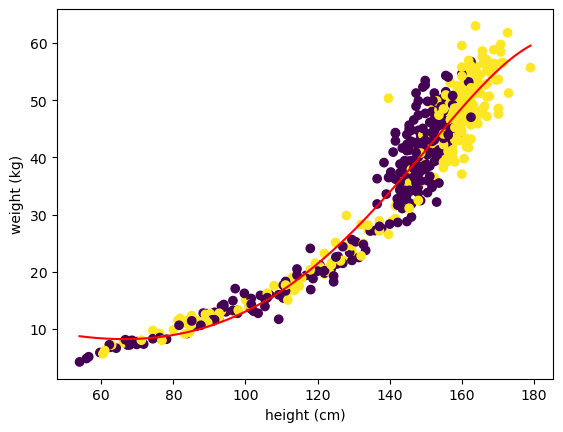

In [80]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']
#Setting Heights
min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)
#List Comprehension
x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = reg_lr_model.predict(inputs_poly)

gender = howell_full['male']
plt.scatter (height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.plot(x_values, y_values, c='red')
plt.show()

### Results
Basic results for our regression models to predict weight on
the Howell data.
| Model | Training Features | Set | RMSE | R2 |
|:---|:---|:---|:---|:---|
|Linear Regression|Height|Training|4.90|88.93|
|Linear Regression|Height|Test|4.27|86.77|
|Linear Regression|Height,Age|Training|4.88|89.04|
|Linear Regression|Height,Age|Test|5.18|87.39|
|Polynomial Regression degree 3|Height|Training|3.82|83.28|
|Polynomial Regression degree 3|Height|Test|4.31|91.30|
|Elastic Net degree 8|Height|Training|3.76|93.49|
|Elastic Net degree 8|Height|Test|4.22|91.66|
|Linear Regression|Weight|Test|4.27|86.77|

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
random_state=123)
for train_indices, test_indices in splitter.split(howell_adults, howell_adults['male']):
    train_set = howell_adults.iloc[train_indices]
    test_set = howell_adults.iloc[test_indices]
print('Train size: ', len(train_set), 'Test size: ', len(test_set))
print('Adult counts', howell_adults['male'].value_counts())
print('Train counts', train_set['male'].value_counts())
print('Test counts', test_set['male'].value_counts())

Train size:  276 Test size:  70
Adult counts 0    182
1    164
Name: male, dtype: int64
Train counts 0    145
1    131
Name: male, dtype: int64
Test counts 0    37
1    33
Name: male, dtype: int64
